<a href="https://colab.research.google.com/github/fclubb/EarthSurfaceProcesses/blob/master/Week1_SoilsAndWeathering/SoilProductionFunction_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The soil production function - Answers
This notebook shows you some potential answers to the questions set out in the soil production function practicals. Your plots and answers might look different, and that's fine - it will depend on the parameters you chose to explore and how you chose to make your figures.

Firstly, we need to import the same packages again.

In [1]:
# import modules for numerical calculations and for plotting
import numpy as np
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

# Customise figure style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=16)

# Couple of other things for displaying model progress
from ipywidgets import FloatProgress
from IPython.display import display
import os

Now let's go through each exercise.

Exercise 1
---

*1. Have a play around and try to change some of the parameters in the peaked function (simply modify in the code block above). How does this affect the curve?*

To answer this question, I changed a few different parameters and added them onto the curve. Firstly, let's look at how changing the critical depth for soil production ($h_c$) affects the curve. It was originally set to 1.5 metres: on the plot below, I have also calculated it at 1 m and 2 m and added it to the graph. The new code is added on at the end of the block.

In [5]:
# First, set up the parameters from the original notebook including the range of soil thicknesses we will evaulate

# define a range of soil thicknesses from 0-5m in 0.1m increments over which to evaluate the equation
h = np.arange(0.,5.,0.1)

# define the constants
W_0 = 0.001 # m/year
k = 0.5 # dimensionless

<Figure size 432x288 with 0 Axes>

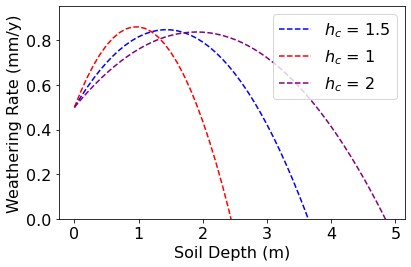

In [9]:
# first, let's clear the original figure
plt.clf()
# make a new figure
fig, ax = plt.subplots()

# define the critical depth for soil production
h_c = 1.5 #metres

# define the initial rate of soil production 
W_0 = 0.0005 #m/year

# define the constant c
c = 2 #dimensionless

# define alpha
alpha = 0.2

# calculate the weathering rate for the range of soil depths, h
f = (1 + c*(h/h_c) - h**2/h_c**2)
W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

# plot the new result with a blue dashed line
ax.plot(h,W*1000.,'--', color='blue', label = '$h_c$ = 1.5')

# set the y limit of the humped function to 0 (so we don't get negative weathering rates), and set the axis labels
ax.set_ylim(0,)
plt.xlabel("Soil Depth (m)")
plt.ylabel("Weathering Rate (mm/y)")
plt.tight_layout()

# NOW CHANGE H_C AND ADD TO THE PLOT
# Firstly, change h_c to 1
new_h_c = 1
# now recalculate the curve
f = (1 + c*(h/new_h_c) - h**2/new_h_c**2)
W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

# plot the new result with a red dashed line
ax.plot(h,W*1000.,'--', color='red', label = '$h_c$ = 1')

# Now change h_c to 2 
new_h_c = 2
# now recalculate the curve
f = (1 + c*(h/new_h_c) - h**2/new_h_c**2)
W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

# plot the new result with a purple dashed line
ax.plot(h,W*1000.,'--', color='purple', label = '$h_c$ = 2')

# add a legend 
plt.legend(loc = 'upper right')

What do you notice when we vary the critical depth for soil production? The lower the critical depth, the shallower the weathering peak, and the more quickly the weathering rate declines with depth.



*2. Try to make a plot with the exponential and peaked functions on the same set of axes, so you can compare them (HINT - copy the line that creates the exponential soil production function into the code block above, and  then give it a different colour).*

To do this, I created a new code block and copied the equations for both peaked and exponential soil production into it:



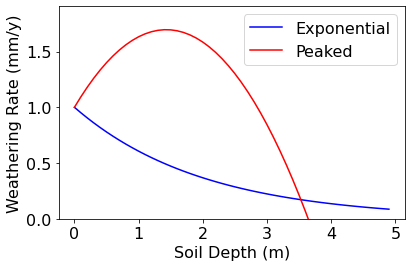

In [13]:
# First, set up the parameters from the original notebook including the range of soil thicknesses we will evaulate

# define a range of soil thicknesses from 0-5m in 0.1m increments over which to evaluate the equation
h = np.arange(0.,5.,0.1)

# define the constants
W_0 = 0.001 # m/year
k = 0.5 # dimensionless

#---------------------------------#

# PLOT THE EXPONENTIAL SOIL PRODUCTION FUNCTION
# execute the soil production equation, we have to use asterisk to times things together
W = W_0*np.exp(-k*h)

# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# make a line plot of h vs W (coloured blue)
# we'll convert W from m/year to mm/year by multiplying by 1000 since there are 1000 mm in a m
ax.plot(h,W*1000.,'b-', label='Exponential')
plt.xlabel("Soil Depth (m)")
plt.ylabel("Weathering Rate (mm/y)")
plt.tight_layout()

#---------------------------------#

# NOW PLOT THE PEAKED SOIL PRODUCTION FUNCTION
# define the critical depth for soil production
h_c = 1.5 #metres

# define the constant c
c = 2 #dimensionless

# define alpha
alpha = 0.2

# calculate the weathering rate for the range of soil depths, h
f = (1 + c*(h/h_c) - h**2/h_c**2)
W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

# plot the new result with a blue dashed line
ax.plot(h,W*1000.,'-', color='red', label = 'Peaked')
# set the y limit to 0 so we don't get negative weathering rates
ax.set_ylim(0,)

# now add a legend
plt.legend(loc='upper right')


You can see in the figure that we have the exponential soil production function coloured in blue, and the peaked coloured in red. You should notice that the weathering rate at the critical depth for soil production is much higher in the peaked soil production function compared to the exponential!

---
## Exercise 2
*Create a figure from the practical today that shows the difference between the peaked and exponential soil production functions for different initial soil production rates. You should write a figure caption that annotates what your soil production plot is showing. The caption should be a paragraph of text that describes each line, and the parameters that have been used to create them, and offers a brief explanation of how the parameters used influence rates of soil production. For an indication of the level of detail required, you could look at examples of captions to figures in journal articles, such as Figure 3 in  
[Heimsath et al. (2012)](https://www.nature.com/ngeo/journal/v5/n3/pdf/ngeo1380.pdf). You can use any program you like, such as Microsoft Word, to create your figure.*

To create a figure showing the difference between them, I decided to use subplots in Python. This means I will create 2 side-by-side plots, the left one showing the exponential soil production function with different initial soil production rates, and the right one showing the peaked soil production function. 

To create subplots, all I have to do is specify the number of rows and number of columns I want when I create a figure. Python will automatically make that number of plots. The plots are then labelled 0, 1, 2, 3, etc...[Python always starts as 0 as the first number].

To show a range of different initial soil production values, I use what's called a **for** loop. This means I can define a range of values in advance, and then get the code to plot each one automatically on my figure.

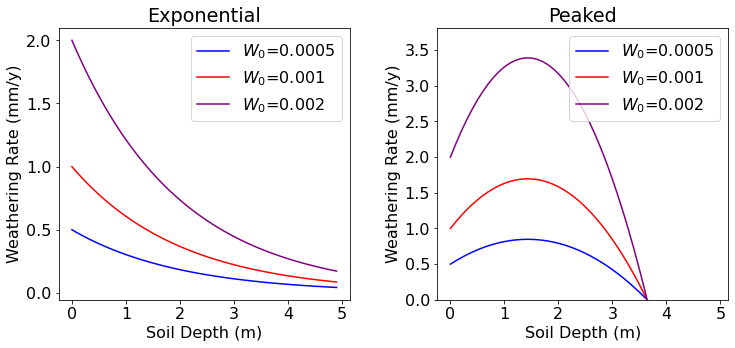

In [23]:
# First, set up my subplots. I want 1 row and 2 columns (2 plots in total)
# set up a figure and set of axes for plotting. I can also specify the figure size in inches (width, height)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.ravel() # this just makes it easier for me to access the plots.

# First, set up the parameters from the original notebook including the range of soil thicknesses we will evaulate

# define a range of soil thicknesses from 0-5m in 0.1m increments over which to evaluate the equation
h = np.arange(0.,5.,0.1)

# define the constants
k = 0.5 # dimensionless

# define the range of initial soil production values that I want to test. I will test 3 values: 0.0005, 0.001, and 0.002.
W_0_values = [0.0005, 0.001, 0.002]
# define the colour I want to give to each value
colours = ['blue', 'red', 'purple']

#------------------------------------#

# now set up my for loop:
for i, W_0 in enumerate(W_0_values): # this means this block of code will be repeated for each value I specified above.
  #---------------------------------#

  # PLOT THE EXPONENTIAL SOIL PRODUCTION FUNCTION.
  # We will plot the exponential equation on the first plot (plot 0)
  # execute the soil production equation, we have to use asterisk to times things together
  W = W_0*np.exp(-k*h)

  # make a line plot of h vs W (coloured blue)
  # we'll convert W from m/year to mm/year by multiplying by 1000 since there are 1000 mm in a m
  ax[0].plot(h,W*1000.,'-', color=colours[i], label='$W_0$='+str(W_0)) # notice how I specify I want it on the left hand figure by putting [0] after the ax. 
                                          # I use colours[i] to give each line the colour I want.

  #---------------------------------#

  # NOW PLOT THE PEAKED SOIL PRODUCTION FUNCTION
  # define the critical depth for soil production
  h_c = 1.5 #metres

  # define the constant c
  c = 2 #dimensionless

  # define alpha
  alpha = 0.2

  # calculate the weathering rate for the range of soil depths, h
  f = (1 + c*(h/h_c) - h**2/h_c**2)
  W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

  # plot the new result with a blue dashed line
  ax[1].plot(h,W*1000.,'-', color=colours[i], label='$W_0$='+str(W_0))
  # set the y limit to 0 so we don't get negative weathering rates


# now set my axes labels for each plot (0 = left hand figure, 1 = right hand figure)
# left hand figure
ax[0].set_xlabel("Soil Depth (m)") # I need to specify the labels I want for the left hand figure axes.
ax[0].set_ylabel("Weathering Rate (mm/y)")
ax[0].set_title('Exponential')
ax[0].legend(loc='upper right')

# right hand figure
ax[1].set_ylim(0,)
ax[1].set_xlabel("Soil Depth (m)") # I need to specify the labels I want for the right hand figure axes.
ax[1].set_ylabel("Weathering Rate (mm/y)")
ax[1].set_title('Peaked')
ax[1].legend(loc='upper right')

# stop the plots being squashed together by adjusting the width space between them
plt.subplots_adjust(wspace=0.3)

There's our figure! You should see that in both cases, increasing the rate of initial soil production increases the overall weathering rate. However, for the exponential function, this increase in weathering rate occurs throughout the entire soil profile, whereas for the peaked function, it increases the weathering rate at the critical depth.